<a href="https://colab.research.google.com/github/ayushs0911/Projects/blob/main/Disaster_tweets_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement 
Constructing a Deep Learning Classification model to predict which Tweets are about real disaster and which one aren't. 


**Project Include tasks like :**
- Downloading Text Dataset from Kaggle
- Visualising Text data 
- Converting text into numbers using tokenization 
- Turning our tokenized text into an embedding 
- Building Deeplearning text models
- Comparing performance of each 
- combining models into an Ensemble 
- Finding the most wrong predictions. 


## Helper functions 
I've made a series of helper functions which can be beneficial in various tasks. So instead of rewriting them again and again, I'll import [helper_functions.py](https://raw.githubusercontent.com/ayushs0911/Projects/main/helper_functions.py) file from github.

In [ ]:
# Download helper functions script
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-03-14 06:48:38--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-03-14 06:48:38 (116 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

## Download a text dataset
We'll be using the [Real or not?](https://www.kaggle.com/c/nlp-getting-started/data) dataset from kaggle which contains text-based Tweets about natural disasters. 


In [ ]:
!wget 'https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip'

unzip_data('nlp_getting_started.zip')


--2023-03-14 06:48:43--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.128, 74.125.20.128, 74.125.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.005s  

2023-03-14 06:48:43 (116 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



Unzipping `nlp_getting_started.zip` gives the following 3 `.csv` files:
- `sample_submission.csv` 
- `train.csv`
- `test.csv`

## Visualizing a test dataset 
Right now text data samples are in the form of `.csv` files. For an easy way to make them visual, we can turn them into pandas DataFrames. 


In [ ]:
import pandas as pd
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
#shuffling training dataframe 
train_df_shuffled = train_df.sample(frac = 1, random_state = 42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


- Training data has a 'target' columns. 
- We'll write code to find patters in `'text'` columns of training dataset to predict `'target'` column. 
- Test dataset doesn't have a `'target'` column. 

In [ ]:
#Checking how many examples of each class 
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

It is a binary classification problem, which is fairly balanced too. About **60%** negative class (`target = 0`) and **40%** positive class (`target = 1`)<br>
`1` = a real disaster tweet <br>
`0` = not a real disaster tweet 

In [ ]:
# How many total samples?
print(f"Total Training samples : {len(train_df)}")
print(f"Total Test Samples : {len(test_df)}")
print(f"Total Samples : {len(train_df) + len(test_df)}")

Total Training samples : 7613
Total Test Samples : 3263
Total Samples : 10876


## Visualising Random text samples

In [ ]:
import random 
random_index = random.randint(0, len(train_df)-5) # creating indexes less than total samples
for row in train_df_shuffled[['text', 'target']][random_index : random_index+5].itertuples():
  _, text, target = row 
  print(f"Target : {target}", '(real disaster)' if target > 0 else '(not real disaster)')
  print(f"Text:\n{text}\n")
  print("---\n")

Target : 0 (not real disaster)
Text:
R'lyeh by Upheaval http://t.co/829n4HJHOL

---

Target : 0 (not real disaster)
Text:
What if every 5000 wins in ranked play gave you a special card back.. Would be cool for the long teÛ_ http://t.co/vq3yaB2j8N

---

Target : 0 (not real disaster)
Text:
@indiepopmom I CANT BREATHE MY LUNGS COLLAPSED

---

Target : 1 (real disaster)
Text:
Fire in Pisgah National Forest grows to 375 acres http://t.co/dao9AZEUcr

---

Target : 0 (not real disaster)
Text:
@pjcoyle ... need to be included in emergency planning for chemical plants. See also http://t.co/OamqqBNIce

---



## Splitting data into training and Validation sets 
- Since test set has no labels, we need a way to evaluate our trained models, we'll splot off some of training data and create a validation set. 
- When our model trains, it'll only see data from training set and we can see how it performs on unseen data using validation set. 
- Converting our splits from pandas Series datatypes to lists of strings(for the text) and lists of ints(for the labels). 

To split our training dataset, we'll use Scikit-Learn's `train_test_split()` method and dedicate 10% of training samples to validation set. 

In [ ]:
from sklearn.model_selection import train_test_split
train_sentances, val_sentances, train_labels, val_labels = train_test_split(train_df_shuffled['text'].to_numpy(),
                                                                            train_df_shuffled['target'].to_numpy(),
                                                                            test_size = 0.1,
                                                                            random_state = 42)

In [ ]:
# Check the lengths
len(train_sentances), len(train_labels), len(val_sentances), len(val_labels)

(6851, 6851, 762, 762)

In [ ]:
train_sentances[:5], train_labels[:5]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk'],
       dtype=object), array([0, 0, 1, 0, 0]))

## Converting text into numbers

In NLP, there are two main concepts for turning text into numbers: 
- **Tokenization** : A straight mapping from word or character or sub-word to a numerical value. There are three main levels of tokenization :
  - Word-level tokenization 
  - Character-level tokenization
  - Sub-word tokenization
- **Embeddings** :  An embedding is a representation of natural language which can be learned. Representation comes in the form of a feature vector. The size of the feature vector is tuneable. There are two ways to use embeddings:
  - Create your own embedding 
  - Reuse a pre-learned embedding 



## Text Vectorization (tokenization)
To Tokenize our words, we'll use the preprocessing layer `tf.keras.layers.experimental.preprocessing.TextVectorization`


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization


For `max_tokens` (number of worjds in the vocabulary), multiples of 10,000(`10,000`, `20,000`, `30,000`) or exact number of unique words in text are common values. <br>
For our use case, we'll use `10,000`. <br>
For the `output_sequence_length` we'll use average number of tokens per Tweet in training set. To find it :

In [ ]:
round(sum([len(i.split()) for i in train_sentances])/len(train_sentances))

15

In [ ]:
#setting up text vectorization 
max_vocab_length = 10000 #max no. of words to have in vocabulary 
max_length = 15 # max length our sequences

text_vectorizer = TextVectorization(max_tokens = max_vocab_length,
                                    output_mode = 'int',
                                    output_sequence_length = max_length)

To map our `TextVectorization` instance `text_vectorizer` to our data, we call the `adapt()` method on it whilst passing it out training text. 

In [ ]:
text_vectorizer.adapt(train_sentances)

Trying `text_vectorizer` on few random sentanaces. 

In [ ]:
#choosing a random sentance from training dataset and tokenize it 
random_sentance = random.choice(train_sentances)
print(f"Original text:\n {random_sentance}\
\n\nVectorized version:")
text_vectorizer([random_sentance])

Original text:
 I'm that traumatised that I can't even spell properly! Excuse the typos!

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  32,   16,  412,   16,    8,   98,  151, 8232, 9531, 5692,    2,
        4353,    0,    0,    0]])>

Checking the unique tokens in our vocabulary using the `get_vocabulary()` method. 

In [ ]:
words_in_vocab = text_vectorizer.get_vocabulary()
print(f"Number of words in vocab : {len(words_in_vocab)}")
print(f"Bottom 5 common words : {words_in_vocab[-5:]}")
print(f"Top 5 common words : {words_in_vocab[:5]}")


Number of words in vocab : 10000
Bottom 5 common words : ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']
Top 5 common words : ['', '[UNK]', 'the', 'a', 'in']


## Creating an Embedding using an Embedding layer 
The powerful thing about an embedding it it can be learned during training. This means rather than just being static, a word's numeric representation can be improved as a model goes through data samples. <br>
Using `tf.keras.Embedding` layer :

In [ ]:
from tensorflow.keras import layers
embedding = layers.Embedding(input_dim = max_vocab_length, #set input shape
                             output_dim = 128, #set size of embedding layer
                             embeddings_initializer = 'uniform',
                             input_length = max_length,
                             name = 'embedding_1')

## Modelling a text dataset 
We are going to build a series of different models, and then compare results of each model and see which one performed best. 
- Model 1 : Feed-Forward neural network
- Model 2 : LSTM model 
- Model 3 : GRU model 
- Model 4 : Bidirectional-LSTM model 
- Model 5 : 1D Convolutional Neural Network 
- Model 6 : TensorFlow Hub Pretrained Feature Extractor 



### Creating an evaluation function for our model experiments 
We are going to evaluate a number of models, let's create a helper function which takes an array of predictions and ground truth labels and computes :
- Accuracy 
- Precision 
- Recall 
- F1-score.  

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def calculate_results(y_true, y_pred):
  model_accuracy = accuracy_score(y_true, y_pred)*100
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average = 'weighted')
  model_results = {'accuracy' : model_accuracy,
                   'precision' : model_precision,
                   'recall' : model_recall,
                   'f1': model_f1}
  return model_results

### Model 1 : A simple dense model 

In [ ]:
from helper_functions import create_tensorboard_callback

#directory to save Tensorboard logs 
SAVE_DIR = 'model_logs'

In [ ]:
#Building model with Functional API 
from tensorflow.keras import layers 
inputs = layers.Input(shape =(1,), dtype = 'string') #inputs are 1-dimensional strings
x = text_vectorizer(inputs) #converting text into numbers
x = embedding(x) #embedding of numericals
x = layers.GlobalAveragePooling1D()(x) #lower the dimensionality of the embedding 
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model_1 = tf.keras.Model(inputs, outputs, name = 'model_1_dense')

#compile the model
model_1.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])


In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d_1   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [ ]:
model_1_history = model_1.fit(train_sentances,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentances, val_labels),
                              callbacks = [create_tensorboard_callback(dir_name = SAVE_DIR, 
                                                                       experiment_name = 'simple_dense_model')])

Saving TensorBoard log files to: model_logs/simple_dense_model/20230314-070248
Epoch 1/5
215/215 [==============================] - 4s 14ms/step - loss: 0.6103 - accuracy: 0.6981 - val_loss: 0.5343 - val_accuracy: 0.7703
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4420 - accuracy: 0.8202 - val_loss: 0.4699 - val_accuracy: 0.7861
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3467 - accuracy: 0.8597 - val_loss: 0.4559 - val_accuracy: 0.7913
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.2836 - accuracy: 0.8913 - val_loss: 0.4655 - val_accuracy: 0.7927
Epoch 5/5
215/215 [==============================] - 3s 13ms/step - loss: 0.2372 - accuracy: 0.9104 - val_loss: 0.4785 - val_accuracy: 0.7900


Let's check model's performance on validation set. 

In [ ]:
model_1.evaluate(val_sentances, val_labels)

24/24 [==============================] - 0s 2ms/step - loss: 0.4785 - accuracy: 0.7900


[0.47845780849456787, 0.7900262475013733]

In [ ]:
#making predictions 
model_1_pred_probs = model_1.predict(val_sentances)

#convert prediction probabilties to prediction classes 
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs)) #removing the extra dimension

24/24 [==============================] - 0s 1ms/step


In [ ]:
model_1_results = calculate_results(y_true = val_labels, 
                                    y_pred = model_1_preds)
model_1_results

{'accuracy': 79.00262467191601,
 'precision': 0.7955103864713003,
 'recall': 0.7900262467191601,
 'f1': 0.7869273549752186}

### Model 2 : LSTM 
We'll use `tensorflow.keras.layers.LSTM()`. <br>
And to make sure we are not reusing trained embeddings (this would cause data leakage between models, leading to uneven comparisons) for our model.  

In [ ]:
#new embedding layer
model_2_embedding = layers.Embedding(input_dim = max_vocab_length, 
                                      output_dim = 128,
                                      embeddings_initializer = 'uniform',
                                      input_length = max_length,
                                      name = 'embedding_2')


#Create LSTM model 
inputs = layers.Input(shape = (1,), dtype = 'string')
x = text_vectorizer(inputs)
x = model_2_embedding(x)
x = layers.LSTM(64)(x)
x = layers.Dense(64, activation = 'relu')(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model_2 = tf.keras.Model(inputs, outputs, name = 'model_2_LSTM')

# compile the model 
model_2.compile(loss='binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [ ]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding_2 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                      

In [ ]:
# Fit model
model_2_history = model_2.fit(train_sentances,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentances, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "LSTM")])

Saving TensorBoard log files to: model_logs/LSTM/20230314-074547
Epoch 1/5
215/215 [==============================] - 7s 23ms/step - loss: 0.5116 - accuracy: 0.7484 - val_loss: 0.4637 - val_accuracy: 0.7743
Epoch 2/5
215/215 [==============================] - 5s 21ms/step - loss: 0.3164 - accuracy: 0.8708 - val_loss: 0.4882 - val_accuracy: 0.7743
Epoch 3/5
215/215 [==============================] - 4s 19ms/step - loss: 0.2151 - accuracy: 0.9153 - val_loss: 0.6178 - val_accuracy: 0.7703
Epoch 4/5
215/215 [==============================] - 5s 22ms/step - loss: 0.1411 - accuracy: 0.9463 - val_loss: 0.8059 - val_accuracy: 0.7690
Epoch 5/5
215/215 [==============================] - 4s 19ms/step - loss: 0.1015 - accuracy: 0.9569 - val_loss: 0.9884 - val_accuracy: 0.7664


In [ ]:
model_2_pred_probs = model_2.predict(val_sentances)

#convert prediction probabilties to prediction classes 
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

24/24 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
#Calculate LSTM model results 
model_2_results = calculate_results(y_true = val_labels, 
                                    y_pred = model_2_preds)
model_2_results

{'accuracy': 76.64041994750657,
 'precision': 0.7676724239336781,
 'recall': 0.7664041994750657,
 'f1': 0.7644156046177798}

### Model 3 : GRU 
Another effective RNN component is. GRU or Gated recurrent unit. <br>
The GRU cell has similar structure features to LSTM cell but has less parameters. <br>
Using `tensorflow.keras.layers.GRU()` class. 

In [ ]:
model_3_embedding = layers.Embedding(input_dim = max_vocab_length,
                                     output_dim = 128,
                                     embeddings_initializer = 'uniform',
                                     input_length = max_length,
                                     name = 'embedding_3')
# Build an RNN using GRU cell 
inputs = layers.Input(shape = (1,), dtype = 'string')
x = text_vectorizer(inputs)
x = model_3_embedding(x)
x = layers.GRU(64)(x)
x = layers.Dense(64, activation ='relu')(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
model_3 = tf.keras.Model(inputs, outputs, name = 'model_3_GRU')

# Compile GRU model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit model
model_3_history = model_3.fit(train_sentances,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentances, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "GRU")])


Saving TensorBoard log files to: model_logs/GRU/20230314-080209
Epoch 1/5
215/215 [==============================] - 6s 21ms/step - loss: 0.5277 - accuracy: 0.7292 - val_loss: 0.4609 - val_accuracy: 0.7861
Epoch 2/5
215/215 [==============================] - 5s 21ms/step - loss: 0.3232 - accuracy: 0.8694 - val_loss: 0.4643 - val_accuracy: 0.7900
Epoch 3/5
215/215 [==============================] - 4s 19ms/step - loss: 0.2223 - accuracy: 0.9167 - val_loss: 0.6323 - val_accuracy: 0.7664
Epoch 4/5
215/215 [==============================] - 4s 18ms/step - loss: 0.1606 - accuracy: 0.9396 - val_loss: 0.6343 - val_accuracy: 0.7585
Epoch 5/5
215/215 [==============================] - 5s 21ms/step - loss: 0.1193 - accuracy: 0.9568 - val_loss: 0.7049 - val_accuracy: 0.7690


In [ ]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding_3 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 gru_1 (GRU)                 (None, 64)                37248     
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                       

In [ ]:
#Predictions on validation data
model_3_pred_probs = model_3.predict(val_sentances)

#convert prediction probabilties to prediction classes 
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

24/24 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calcuate model_3 results
model_3_results = calculate_results(y_true=val_labels, 
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 76.9028871391076,
 'precision': 0.7692529451017919,
 'recall': 0.7690288713910761,
 'f1': 0.7677604393034507}

### Model 4 : Bidirectional RNN Model 
A Standard RNN will process a sequence from left to right, where as Bidirectional RNN will process the sequence from left to right and then again from right to left. <br>
We'll use `tensorflow.keras.layers.Bidirectional`


In [ ]:
# new embedding layer 
model_4_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_4")

# Build a Bidirectional RNN in TensorFlow
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_4_embedding(x)
x = layers.Bidirectional(layers.LSTM(64))(x) # bidirectional goes both ways so has double the parameters of a regular LSTM layer
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_Bidirectional")

# Compile
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model (takes longer because of the bidirectional layers)
model_4_history = model_4.fit(train_sentances,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentances, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "bidirectional_RNN")])

Saving TensorBoard log files to: model_logs/bidirectional_RNN/20230314-081141
Epoch 1/5
215/215 [==============================] - 10s 29ms/step - loss: 0.5083 - accuracy: 0.7501 - val_loss: 0.4561 - val_accuracy: 0.7822
Epoch 2/5
215/215 [==============================] - 6s 28ms/step - loss: 0.3137 - accuracy: 0.8673 - val_loss: 0.4826 - val_accuracy: 0.7808
Epoch 3/5
215/215 [==============================] - 5s 24ms/step - loss: 0.2065 - accuracy: 0.9225 - val_loss: 0.5690 - val_accuracy: 0.7690
Epoch 4/5
215/215 [==============================] - 6s 28ms/step - loss: 0.1403 - accuracy: 0.9502 - val_loss: 0.8281 - val_accuracy: 0.7651
Epoch 5/5
215/215 [==============================] - 5s 24ms/step - loss: 0.0996 - accuracy: 0.9651 - val_loss: 0.9188 - val_accuracy: 0.7520


In [ ]:
# Get a summary of our bidirectional model
model_4.summary()

Model: "model_4_Bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding_4 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_10 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,3

In [ ]:
model_4_pred_probs = model_4.predict(val_sentances)

# Convert prediction probabilities to labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

24/24 [==============================] - 1s 5ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate bidirectional RNN model results
model_4_results = calculate_results(val_labels, model_4_preds)
model_4_results

{'accuracy': 75.19685039370079,
 'precision': 0.7548521446853059,
 'recall': 0.7519685039370079,
 'f1': 0.7487310335449245}

### Model 5 : Conv1D

In [ ]:
#new embedding layer 
from tensorflow.keras import layers
model_5_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_5")

# Create 1-dimensional convolutional layer to model sequences
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_5_embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)
# x = layers.Dense(64, activation="relu")(x)  
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")

# Compile Conv1D model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_5_history = model_5.fit(train_sentances,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentances, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "Conv1D")])


Saving TensorBoard log files to: model_logs/Conv1D/20230314-083018
Epoch 1/5
215/215 [==============================] - 4s 14ms/step - loss: 0.5659 - accuracy: 0.7101 - val_loss: 0.4735 - val_accuracy: 0.7900
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3465 - accuracy: 0.8575 - val_loss: 0.4748 - val_accuracy: 0.7900
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.2174 - accuracy: 0.9221 - val_loss: 0.5328 - val_accuracy: 0.7703
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.1376 - accuracy: 0.9543 - val_loss: 0.6276 - val_accuracy: 0.7677
Epoch 5/5
215/215 [==============================] - 3s 13ms/step - loss: 0.0983 - accuracy: 0.9688 - val_loss: 0.6881 - val_accuracy: 0.7625


In [ ]:
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding_5 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 32)            20512     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_13 (Dense)            (None, 1)              

In [ ]:
# Make predictions with model_5
model_5_pred_probs = model_5.predict(val_sentances)

# Convert model_5 prediction probabilities to labels
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

24/24 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate model_5 evaluation metrics 
model_5_results = calculate_results(y_true=val_labels, 
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 76.24671916010499,
 'precision': 0.7639905060800456,
 'recall': 0.7624671916010499,
 'f1': 0.7602456873168202}

### Model 6: TensorFlow Hub Pretrained Sentence Encoder

The main difference between the embedding layer we created and the Universal Sentence Encoder is that rather than create a word-level embedding, the Universal Sentence Encoder, creates a whole sentence-level embedding.

Our embedding layer also outputs an a 128 dimensional vector for each word, where as, the Universal Sentence Encoder outputs a 512 dimensional vector for each sentence.<br>
We can load in TensorFlow hub module using `hub.load()` method and passing it the target url of the module. 

In [ ]:
#Loading universal sentance encoder
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4") # load Universal Sentence Encoder
embed_samples = embed(["When you call the universal sentence encoder on a sentence, it turns it into numbers."])

print(embed_samples[0][:50])

tf.Tensor(
[ 0.03596691 -0.08579469 -0.01152743  0.00525982 -0.01852172 -0.05042012
 -0.03616941  0.00534677  0.04805917  0.04690744 -0.0372333  -0.01149546
  0.04352415  0.07050991  0.0709376  -0.08180431  0.00871717 -0.04654121
 -0.02245776  0.04686872  0.00202256  0.03099072  0.02043563  0.06392168
 -0.07641086  0.08421179 -0.04576042 -0.00106165 -0.02059416  0.01241106
  0.05727539  0.0381562  -0.02742118 -0.00354347 -0.09832586 -0.01244854
  0.0386563   0.05031953 -0.02362506  0.00321848  0.03225209  0.00738095
  0.04473104 -0.00412236  0.01151601  0.02837724  0.00060139 -0.05903354
 -0.00494347 -0.00688527], shape=(50,), dtype=float32)


In [ ]:
embed_samples.shape

TensorShape([1, 512])

We can convert the TensorFlow hub USE module into a Keras layer usisng the `hub.kerasLayer` class

In [ ]:
sentance_encoded_layer = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',
                                        input_shape = [],
                                        dtype = tf.string,
                                        trainable = False, 
                                        name = 'USE')

In [ ]:
# Creating model using Sequential API
model_6 = tf.keras.Sequential([
    sentance_encoded_layer,
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
], name = 'model_6_USE')

# Compile model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Train a classifier on top of pretrained embeddings
model_6_history = model_6.fit(train_sentances,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentances, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "tf_hub_sentence_encoder")])

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20230314-084231
Epoch 1/5
215/215 [==============================] - 5s 10ms/step - loss: 0.5102 - accuracy: 0.7825 - val_loss: 0.4456 - val_accuracy: 0.8005
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.4145 - accuracy: 0.8151 - val_loss: 0.4365 - val_accuracy: 0.8045
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.4015 - accuracy: 0.8189 - val_loss: 0.4312 - val_accuracy: 0.8097
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.3931 - accuracy: 0.8256 - val_loss: 0.4308 - val_accuracy: 0.8150
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3853 - accuracy: 0.8297 - val_loss: 0.4286 - val_accuracy: 0.8163


In [ ]:
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_14 (Dense)            (None, 64)                32832     
                                                                 
 dense_15 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


The Number of paramters in the USE layer are the pretrained weights, learned on various text sources (Wikipedia, web news, web question-answer forums, etc).

The trainable parameters are only in our output layers, in other words, we're keeping the USE weights frozen and using it as a feature-extractor. We could fine-tune these weights by setting `trainable=True` when creating the `hub.KerasLayer` instance.

In [ ]:
# Make predictions with USE TF Hub model
model_6_pred_probs = model_6.predict(val_sentances)
# Convert prediction probabilities to labels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

24/24 [==============================] - 0s 7ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculate model 6 performance metrics
model_6_results = calculate_results(val_labels, model_6_preds)
model_6_results

{'accuracy': 81.62729658792651,
 'precision': 0.818446310697231,
 'recall': 0.8162729658792651,
 'f1': 0.8148082644367335}

## Comparing the performance of each our models
To Visualise our model's performance, let's create a pandas DataFrame from our results dictionaries and then plot it. 


In [ ]:
#Combine model results into a DataFrame
all_model_results = pd.DataFrame({'simple_dense': model_1_results,
                                 'lstm' : model_2_results,
                                 'gru' : model_3_results,
                                 'bidirectional' : model_4_results,
                                 'conv1d' : model_5_results,
                                 'tf_hub_setance_encoder' : model_6_results})
all_model_results = all_model_results.transpose()

In [ ]:
# Reducing the accuracy to same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100
all_model_results

,accuracy,precision,recall,f1
simple_dense,0.790026,0.795510,0.790026,0.786927
lstm,0.766404,0.767672,0.766404,0.764416
gru,0.769029,0.769253,0.769029,0.767760
bidirectional,0.751969,0.754852,0.751969,0.748731
conv1d,0.762467,0.763991,0.762467,0.760246
tf_hub_setance_encoder,0.816273,0.818446,0.816273,0.814808


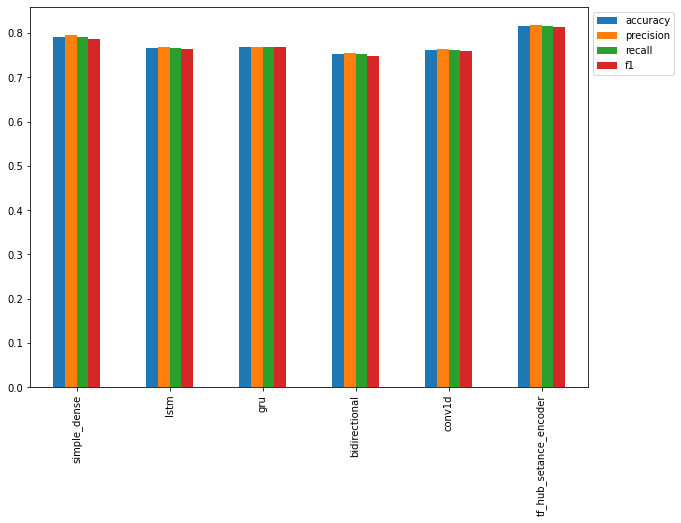

In [ ]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

It looks like Pre-trained USE Tensorflow Hub model have best performance. 

<AxesSubplot:>

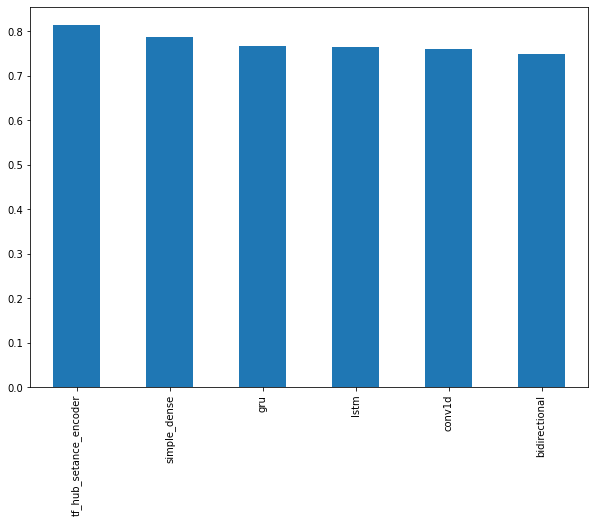

In [ ]:
#sort model results by f1-score 
all_model_results.sort_values('f1', ascending = False)['f1'].plot(kind = 'bar', figsize = (10,7))

## Making predictions on the test dataset
We don't have labels for the test dataset so we're going to have to make some predictions and inspect them for ourselves.

In [ ]:
#making predictions on test dataset 
test_sentances = test_df['text'].to_list()
test_samples = random.sample(test_sentances, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6.predict([test_sample]))
  pred = tf.round(pred_prob)
  print(f"Pred : {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("----\n")

1/1 [==============================] - 0s 336ms/step
Pred : 1, Prob: 0.7563539147377014
Text:
I'm security so they want me to help out in case of emergency like the buildings on fire or a shooter's in the building. I'm leaving tho..

----

1/1 [==============================] - 0s 177ms/step
Pred : 0, Prob: 0.2631556987762451
Text:
MGS4 came out during a time of great upheaval in my life and itÛªs very odd that MGSV is coming and itÛªs also when things are getting iffy

----

1/1 [==============================] - 0s 63ms/step
Pred : 0, Prob: 0.12955081462860107
Text:
Enjoying the shade under this tree. The sun is blazing but there is a cool breeze. @ West Hollywood Park https://t.co/2wzHj0lNa6

----

1/1 [==============================] - 0s 126ms/step
Pred : 0, Prob: 0.1443932205438614
Text:
@SheriffClarke @FreeAmerican100 If a carpenter built your house and it collapsed would you ask the same carpenter to rebuild it?

----

1/1 [==============================] - 0s 125ms/step
Pred